In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
print(df.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])


In [7]:
df['city'] = df['city'].astype('category')

In [8]:
df['statezip'] = df['statezip'].astype('category')

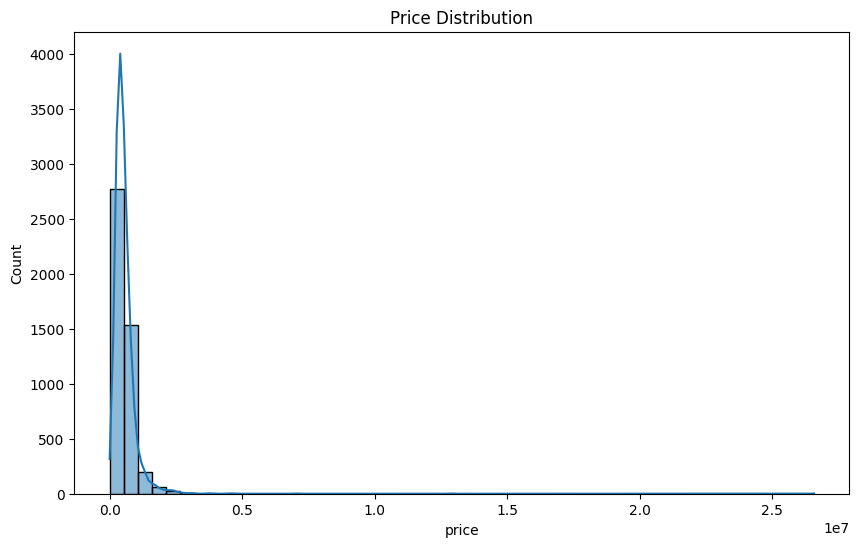

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()


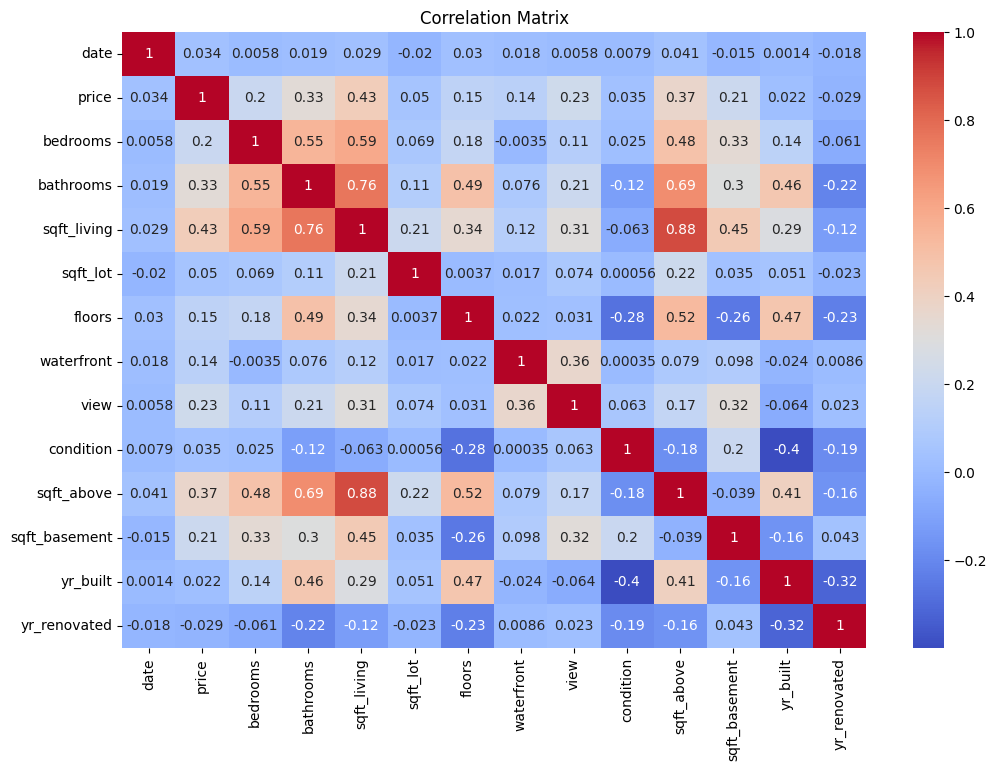

In [14]:
plt.figure(figsize=(12, 8))
df1=df.drop(['street','city','statezip','country'],axis='columns')
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month




In [18]:
df['house_age'] = df['year'] - df['yr_built']
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']


In [19]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,year,month,house_age,total_sqft
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,59,1340
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,93,3930
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,48,1930
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,51,3000
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,38,2740


<ipython-input-20-5f880a9337b4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[v],kde=True,palette='plasma')
<ipython-input-20-5f880a9337b4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[v],kde=True,palette='plasma')
<ipython-input-20-5f880a9337b4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[v],kde=True,palette='plasma')


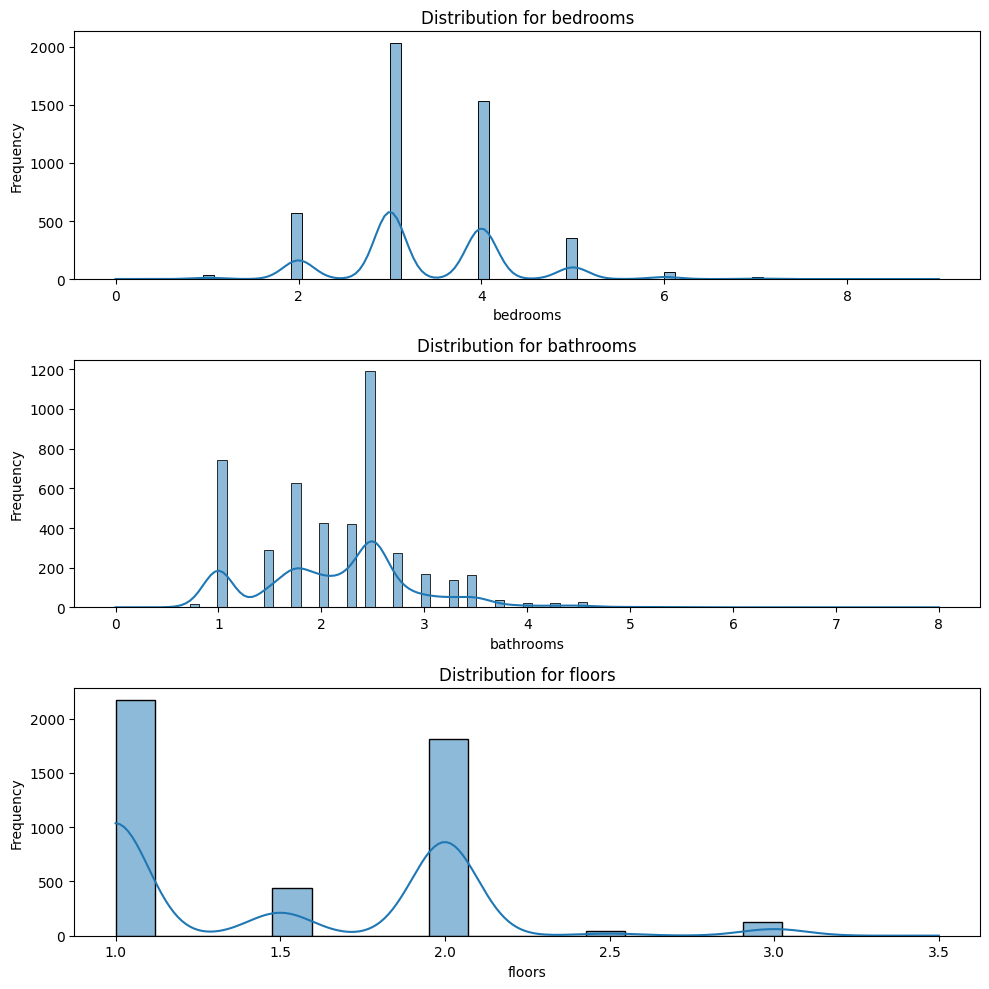

In [20]:
l=['bedrooms','bathrooms','floors']
plt.figure(figsize=(10,10))
for i,v in enumerate(l,1):
    plt.subplot(3,1,i)
    sns.histplot(df[v],kde=True,palette='plasma')
    plt.title(f'Distribution for {v}')
    plt.xlabel(v)
    plt.ylabel('Frequency')
plt.tight_layout()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

y=df['price']
x = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1)
scaler = StandardScaler()
scaler.fit(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.012552,random_state=58)
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
print(f"x train examples -->{x_train.shape[0]} from {x.shape[0]}")
print(f"x test examples -->{x_test.shape[0]} from {y.shape[0]}")


x train examples -->4542 from 4600
x test examples -->58 from 4600


In [24]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score

y_test_pre=lr.predict(x_test)
test_acc=r2_score(y_test,y_test_pre)
test_acc

0.8455796439159687

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
from sklearn.metrics import mean_squared_error

# Predictions
lr_predictions = lr.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"Linear Regression RMSE: {lr_rmse}, R²: {lr_r2}")
print(f"Random Forest RMSE: {rf_rmse}, R²: {rf_r2}")
print(f"XGBoost RMSE: {xgb_rmse}, R²: {xgb_r2}")


Linear Regression RMSE: 1540306.6915400852, R²: -15.916280393497598
Random Forest RMSE: 184325.3638330486, R²: 0.7577517376668366
XGBoost RMSE: 280181.73872017115, R²: 0.440280905350249


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [29]:
import joblib

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'house_price_model.pkl')


['house_price_model.pkl']

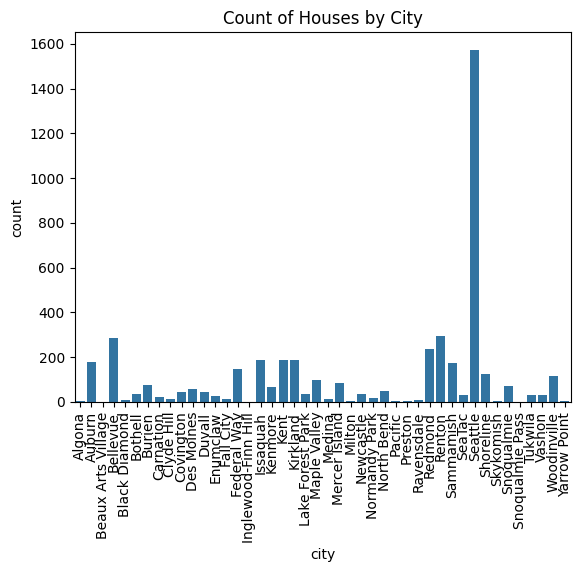

In [30]:
sns.countplot(x='city', data=df)
plt.title('Count of Houses by City')
plt.xticks(rotation=90)
plt.show()


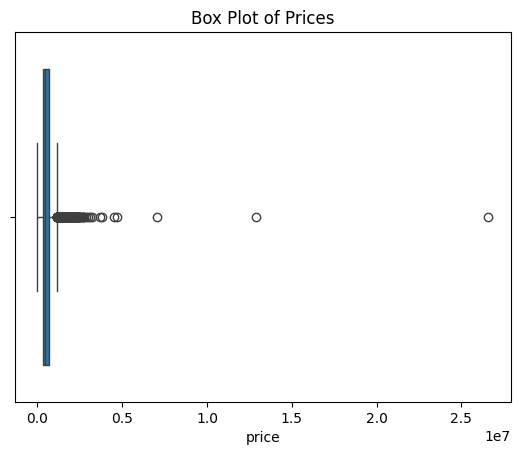

In [31]:
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()
